### IMPORT

In [ ]:
!pip install pythainlp
import pythainlp as pyth
import pandas as pd
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 25.0 MB/s 


### CHECK AND PREPARE DATA

In [ ]:
train = pd.read_csv('/content/train.csv')

In [ ]:
dev = pd.read_csv('/content/dev.csv')

In [ ]:
# train['text'] = train['text'].apply(lambda x: re.sub(r'[\,;:\'\"]', '', x))
# dev['text'] = dev['text'].apply(lambda x: re.sub(r'[\,;:\'\"]', '', x))

#ลูกน้ำ, colon, semicolon

In [ ]:
train.head()

,text,label
0,25262468ย่อสั้นขณะที่อ.ลูกจ้างของจำเลยขับรถยนต...,unfavorable
1,25391016ย่อสั้นโจทก์บรรยายฟ้องอ้างเหตุว่าจำเลย...,unfavorable
2,25547634ย่อสั้นมติของแพทยสภาไม่ใช่กฎหมายและไม่...,partially favorable
3,2525949ย่อสั้นโจทก์ประกอบกิจการโรงแรมชื่อรามาด...,unfavorable
4,2538243ย่อสั้นโจทก์ฟ้องในฐานะผู้จัดการมรดกของพ...,favorable


In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Feature engineering
def featurize(text):
  return {x:1 for x in pyth.word_tokenize(text)}

vectorizer = DictVectorizer(sparse=True)
train_features = train['text'].apply(featurize)
feature_vectors = vectorizer.fit_transform(train_features)

# Train model
lr_text_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_text_classifier.fit(feature_vectors, train['label'])

# Evaluation
dev_features = dev['text'].apply(featurize)
dev_feature_vectors = vectorizer.transform(dev_features)
dev_predictions = lr_text_classifier.predict(dev_feature_vectors)
print (classification_report(dev_predictions, dev['label']))

                     precision    recall  f1-score   support

          favorable       0.78      0.64      0.70        22
              other       0.64      0.90      0.75        10
partially favorable       0.88      0.75      0.81        28
        unfavorable       0.75      0.94      0.83        16

           accuracy                           0.78        76
          macro avg       0.76      0.81      0.77        76
       weighted avg       0.79      0.78      0.77        76



In [ ]:
train_features

0      {'2526': 1, '/': 1, '2468': 1, 'ย่อ': 1, 'สั้น...
1      {'2539': 1, '/': 1, '1016': 1, 'ย่อ': 1, 'สั้น...
2      {'2554': 1, '/': 1, '7634': 1, 'ย่อ': 1, 'สั้น...
3      {'2525': 1, '/': 1, '949': 1, 'ย่อ': 1, 'สั้น'...
4      {'2538': 1, '/': 1, '243': 1, 'ย่อ': 1, 'สั้น'...
                             ...                        
299    {'2539': 1, '/': 1, '5048': 1, 'ย่อ': 1, 'สั้น...
300    {'2533': 1, '/': 1, '829': 1, 'ย่อ': 1, 'สั้น'...
301    {'2517': 1, '/': 1, '2647': 1, 'ย่อ': 1, 'สั้น...
302    {'2545': 1, '/': 1, '2803': 1, 'ย่อ': 1, 'สั้น...
303    {'2534': 1, '/': 1, '3805': 1, 'ย่อ': 1, 'สั้น...
Name: text, Length: 304, dtype: object

In [ ]:
weights = pd.DataFrame(lr_text_classifier.coef_, columns=vectorizer.feature_names_, index=lr_text_classifier.classes_)

In [ ]:
weights

,"""","""""","""คน",',(,(ก),(ข),(ค),),)(ค),...,๘,"๘๐,๐๐๐",๘๑๔๕,๘๕,๘๕๗๖,๘๗๓๓,๘๙๑๗,๙,"๙,๐๐๐",๙๙
favorable,0.092655,0.054994,-0.009024,-0.009024,0.015269,0.024718,0.054455,0.024718,0.010976,-0.001587,...,0.016535,0.017612,-0.002509,0.023623,-0.004599,-0.004489,-0.005063,0.012042,-0.026349,0.014551
other,-0.073702,-0.016018,-0.000974,-0.000974,0.079402,-0.008358,-0.005304,-0.008358,0.100239,-0.001288,...,-0.001374,-0.000673,-0.001224,-0.001695,-0.000472,-0.008360,-0.002250,-0.005696,-0.001588,-0.004473
partially favorable,0.001215,-0.008022,-0.017475,-0.017475,-0.101237,-0.020614,-0.024807,-0.020614,-0.092688,0.009686,...,-0.000630,-0.014866,0.016536,-0.008328,0.012254,0.020875,0.020858,0.019779,0.033287,0.003243
unfavorable,-0.020169,-0.030954,0.027473,0.027473,0.006566,0.004253,-0.024344,0.004253,-0.018528,-0.006812,...,-0.014531,-0.002073,-0.012803,-0.013599,-0.007182,-0.008026,-0.013545,-0.026125,-0.005350,-0.013322


In [ ]:
weights.transpose().head(25)

,favorable,other,partially favorable,unfavorable
"""",0.092655,-0.073702,0.001215,-0.020169
"""""",0.054994,-0.016018,-0.008022,-0.030954
"""คน",-0.009024,-0.000974,-0.017475,0.027473
',-0.009024,-0.000974,-0.017475,0.027473
(,0.015269,0.079402,-0.101237,0.006566
(ก),0.024718,-0.008358,-0.020614,0.004253
(ข),0.054455,-0.005304,-0.024807,-0.024344
(ค),0.024718,-0.008358,-0.020614,0.004253
),0.010976,0.100239,-0.092688,-0.018528
)(ค),-0.001587,-0.001288,0.009686,-0.006812


In [ ]:
weights.transpose().sort_values('unfavorable', ascending=False)

,favorable,other,partially favorable,unfavorable
ละเมิด,0.011822,-0.288903,-0.103234,0.380315
ตาม,-0.293241,-0.006600,-0.056622,0.356463
ยกฟ้อง,-0.287700,-0.042480,0.037908,0.292272
โดยสุจริต,-0.161364,-0.147730,0.049388,0.259707
ไม่เป็นการ,-0.079624,-0.086190,-0.090751,0.256566
...,...,...,...,...
เดือน,0.175952,-0.097462,0.178268,-0.256758
1,0.194375,-0.213171,0.279926,-0.261130
มีอำนาจ,0.282682,-0.011877,0.005773,-0.276578
อยู่,0.308375,-0.123957,0.110552,-0.294970


In [ ]:
# weights.transpose().loc['ดีมาก']

In [ ]:
pd.DataFrame(lr_text_classifier.intercept_, index=lr_text_classifier.classes_)

,0
favorable,-0.182878
other,2.568788
partially favorable,-2.772169
unfavorable,0.386259


# แบบมี Spacebar
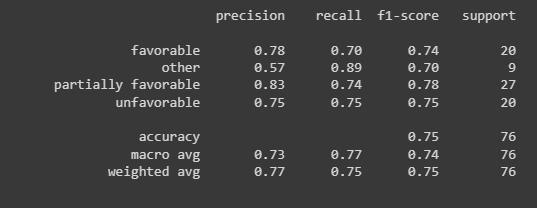

# ไม่มี Spacebar
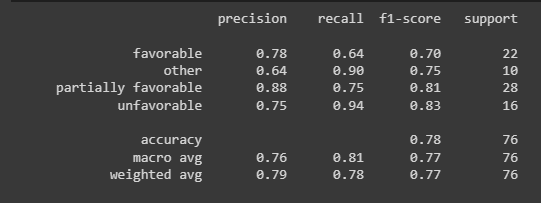

# ตัด Pucntation หมด
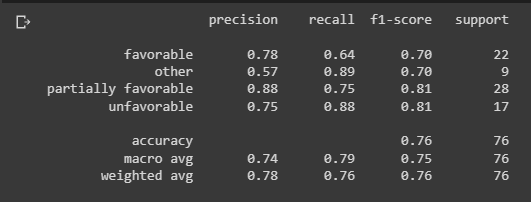

## ตัด Punc บางส่วนพอ
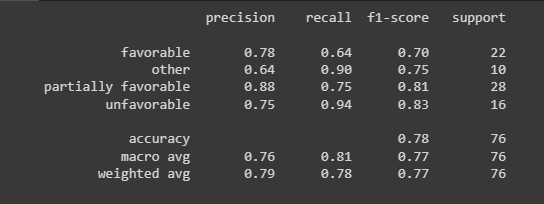

# New one with more clean data

In [ ]:
train = pd.read_csv('/content/train.csv')

In [ ]:
dev = pd.read_csv('/content/dev.csv')

In [ ]:
train.head()

,text,label
0,2525/581ย่อสั้นจำเลยเป็นธนาคารละเลยไม่เรียกเก็...,favorable
1,2533/829ย่อสั้นโจทก์ฟ้องขอให้จำเลยรับผิดใช้ค่า...,unfavorable
2,2533/829ย่อสั้นโจทก์ฟ้องขอให้จำเลยรับผิดใช้ค่า...,unfavorable
3,2519/248ย่อสั้นสมรสตามพิธีมีสินสอดแต่ไม่มีการห...,unfavorable
4,2555/406ย่อสั้นแม้จำเลยจะเป็นผู้ยื่นแบบขอใช้ไฟ...,unfavorable


In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Feature engineering
def featurize(text):
  return {x:1 for x in pyth.word_tokenize(text)}

vectorizer = DictVectorizer(sparse=True)
train_features = train['text'].apply(featurize)
feature_vectors = vectorizer.fit_transform(train_features)

# Train model
lr_text_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_text_classifier.fit(feature_vectors, train['label'])

# Evaluation
dev_features = dev['text'].apply(featurize)
dev_feature_vectors = vectorizer.transform(dev_features)
dev_predictions = lr_text_classifier.predict(dev_feature_vectors)
print (classification_report(dev_predictions, dev['label']))

                     precision    recall  f1-score   support

          favorable       0.82      0.53      0.64        17
              other       0.46      0.86      0.60         7
partially favorable       0.84      0.81      0.82        26
        unfavorable       0.85      0.88      0.86        25

           accuracy                           0.77        75
          macro avg       0.74      0.77      0.73        75
       weighted avg       0.80      0.77      0.77        75



In [ ]:
train_features

0      {'2526': 1, '/': 1, '2468': 1, 'ย่อ': 1, 'สั้น...
1      {'2539': 1, '/': 1, '1016': 1, 'ย่อ': 1, 'สั้น...
2      {'2554': 1, '/': 1, '7634': 1, 'ย่อ': 1, 'สั้น...
3      {'2525': 1, '/': 1, '949': 1, 'ย่อ': 1, 'สั้น'...
4      {'2538': 1, '/': 1, '243': 1, 'ย่อ': 1, 'สั้น'...
                             ...                        
299    {'2539': 1, '/': 1, '5048': 1, 'ย่อ': 1, 'สั้น...
300    {'2533': 1, '/': 1, '829': 1, 'ย่อ': 1, 'สั้น'...
301    {'2517': 1, '/': 1, '2647': 1, 'ย่อ': 1, 'สั้น...
302    {'2545': 1, '/': 1, '2803': 1, 'ย่อ': 1, 'สั้น...
303    {'2534': 1, '/': 1, '3805': 1, 'ย่อ': 1, 'สั้น...
Name: text, Length: 304, dtype: object

In [ ]:
weights = pd.DataFrame(lr_text_classifier.coef_, columns=vectorizer.feature_names_, index=lr_text_classifier.classes_)

In [ ]:
weights

,"""","""""","""คน",',(,(ก),(ข),(ค),),)(ค),...,๘,"๘๐,๐๐๐",๘๑๔๕,๘๕,๘๕๗๖,๘๗๓๓,๘๙๑๗,๙,"๙,๐๐๐",๙๙
favorable,0.092655,0.054994,-0.009024,-0.009024,0.015269,0.024718,0.054455,0.024718,0.010976,-0.001587,...,0.016535,0.017612,-0.002509,0.023623,-0.004599,-0.004489,-0.005063,0.012042,-0.026349,0.014551
other,-0.073702,-0.016018,-0.000974,-0.000974,0.079402,-0.008358,-0.005304,-0.008358,0.100239,-0.001288,...,-0.001374,-0.000673,-0.001224,-0.001695,-0.000472,-0.008360,-0.002250,-0.005696,-0.001588,-0.004473
partially favorable,0.001215,-0.008022,-0.017475,-0.017475,-0.101237,-0.020614,-0.024807,-0.020614,-0.092688,0.009686,...,-0.000630,-0.014866,0.016536,-0.008328,0.012254,0.020875,0.020858,0.019779,0.033287,0.003243
unfavorable,-0.020169,-0.030954,0.027473,0.027473,0.006566,0.004253,-0.024344,0.004253,-0.018528,-0.006812,...,-0.014531,-0.002073,-0.012803,-0.013599,-0.007182,-0.008026,-0.013545,-0.026125,-0.005350,-0.013322


In [ ]:
weights.transpose().head(25)

,favorable,other,partially favorable,unfavorable
"""",0.092655,-0.073702,0.001215,-0.020169
"""""",0.054994,-0.016018,-0.008022,-0.030954
"""คน",-0.009024,-0.000974,-0.017475,0.027473
',-0.009024,-0.000974,-0.017475,0.027473
(,0.015269,0.079402,-0.101237,0.006566
(ก),0.024718,-0.008358,-0.020614,0.004253
(ข),0.054455,-0.005304,-0.024807,-0.024344
(ค),0.024718,-0.008358,-0.020614,0.004253
),0.010976,0.100239,-0.092688,-0.018528
)(ค),-0.001587,-0.001288,0.009686,-0.006812


In [ ]:
weights.transpose().sort_values('unfavorable', ascending=False)

,favorable,other,partially favorable,unfavorable
ละเมิด,0.011822,-0.288903,-0.103234,0.380315
ตาม,-0.293241,-0.006600,-0.056622,0.356463
ยกฟ้อง,-0.287700,-0.042480,0.037908,0.292272
โดยสุจริต,-0.161364,-0.147730,0.049388,0.259707
ไม่เป็นการ,-0.079624,-0.086190,-0.090751,0.256566
...,...,...,...,...
เดือน,0.175952,-0.097462,0.178268,-0.256758
1,0.194375,-0.213171,0.279926,-0.261130
มีอำนาจ,0.282682,-0.011877,0.005773,-0.276578
อยู่,0.308375,-0.123957,0.110552,-0.294970


In [ ]:
# weights.transpose().loc['ดีมาก']

# Weird result but ok (no spacebar version)

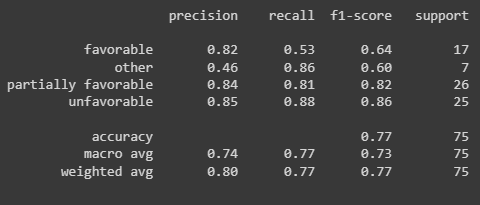